In [1]:
using Revise
includet("../../scripts/competing_mms.jl")

In [2]:
using GLMakie
using CairoMakie
CairoMakie.activate!()

# No-space

  0.000526 seconds (1.31 k allocations: 137.609 KiB)


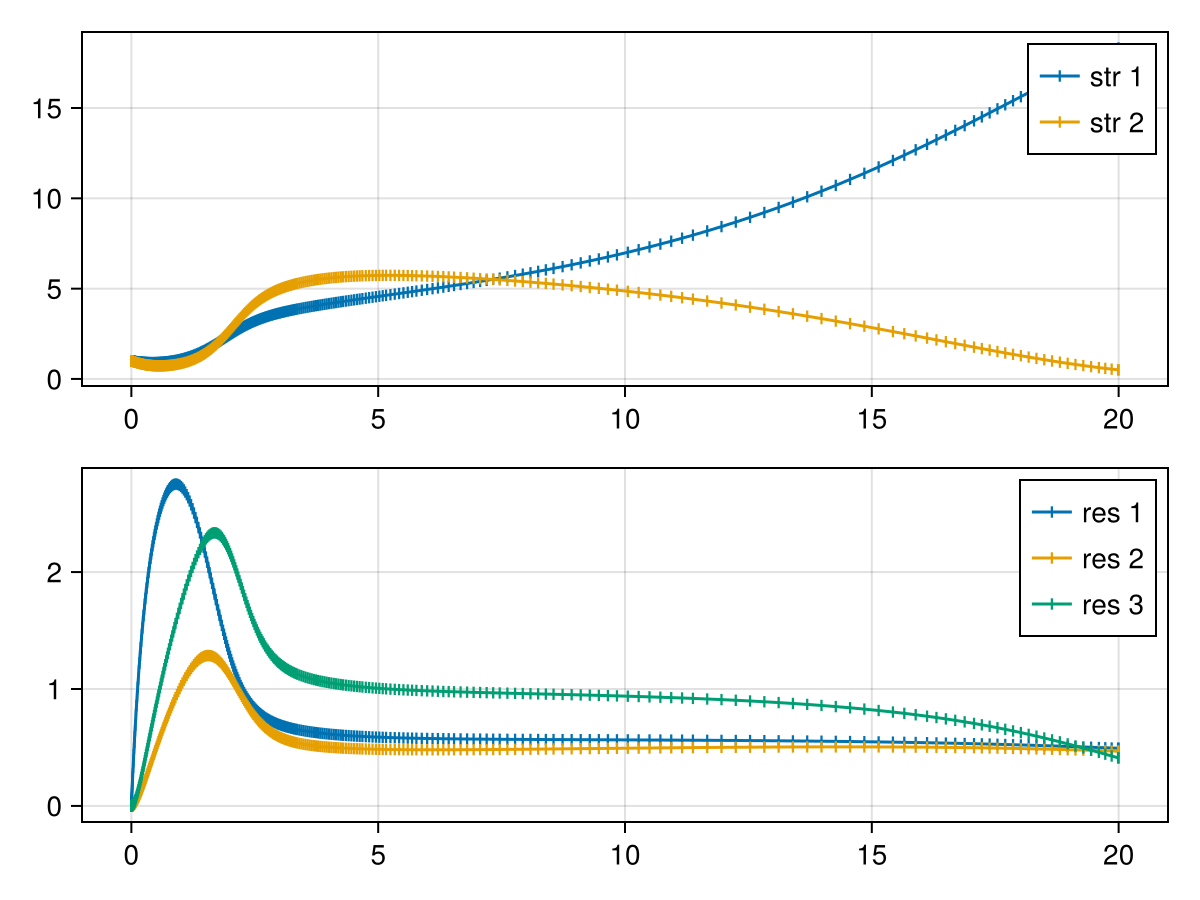

In [99]:
ps = make_comp_mms_params(
    10.,
    0.4, 1.,
    1., 1.,
    1., 2.
)
p = make_mmicrm_problem(ps, [1., 1.0, 0., 0., 0.], 2e1)
tol = 1e-8
@time s = solve(p, QNDF();
    abstol=tol, reltol=tol,
);

f = plot_mmicrm_sol(s)
# display(GLMakie.Screen(), f.figure)
f

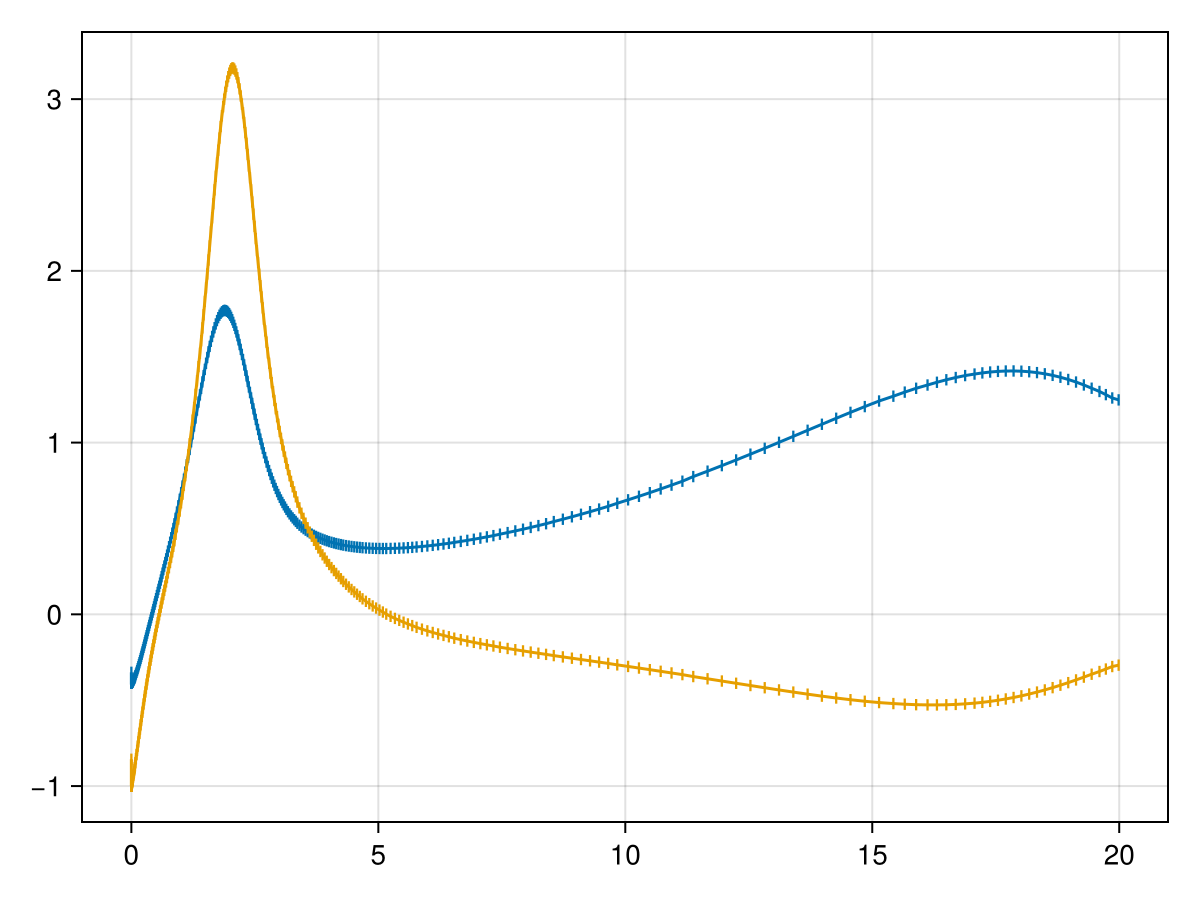

In [100]:
function ddxx(s, i)
    xx = getindex.(s.u, i)
    dxs = xx[2:end] .- xx[1:(end-1)]
    dts = s.t[2:end] .- s.t[1:(end-1)]
    dxs ./ dts
end
dN1 = ddxx(s, 1)
dN2 = ddxx(s, 2);
fap = scatterlines(s.t[1:end-1], dN1; marker=:vline)
scatterlines!(fap.axis, s.t[1:end-1], dN2; marker=:vline)
fap

## High N0s

In [ ]:
K = 10.


ps = make_comp_mms_params(
    10.,
    1., 1.,
    0.9, 1.,
    1., 2.
)
p = make_mmicrm_problem(ps, [1., 1., 0., 0., 0.], 1e2)
tol = 1e-8
@time s = solve(p, QNDF();
    abstol=tol, reltol=tol,
);

# Spatial

In [156]:
ps = make_comp_mms_params(
    10.,
    0.9, 1.,
    1., 1.,
    1., 1.1
)
Ds = SA[1e-6, 1e-6, 1., 1., 1e-3]

L = 5
sN = 2000
dx = L / sN

nothing

In [157]:
N0 = 1.
u0 = expand_u0_to_size((sN,), [N0, N0, 0., 0., 0.])
fu0 = clamp.(perturb_u0_uniform(2, 3, u0, 1.), 0., Inf);

In [158]:
Nxx = 100.
fu0 = fill(0., 5, sN)
N1 = @view fu0[1,:]
N2 = @view fu0[2,:]
N1 .= Nxx
N2 .= Nxx

numwaves = 1
add_1d_many_sines!(N1, numwaves, Nxx / numwaves, dx)
add_1d_many_sines!(N2, numwaves, Nxx / numwaves, dx)

fu0;

In [159]:
sps = BSMMiCRMParams(
    ps,
    Ds,
    CartesianSpace{1,Tuple{Periodic}}(SA[dx]),
    nthreads()
)

p = make_smmicrm_problem(sps, fu0, 1e8)
tol = 1e-8
@time s = solve(p, QNDF();
    abstol=tol, reltol=tol,
);

 40.393273 seconds (8.30 M allocations: 7.105 GiB, 28.38% gc time)


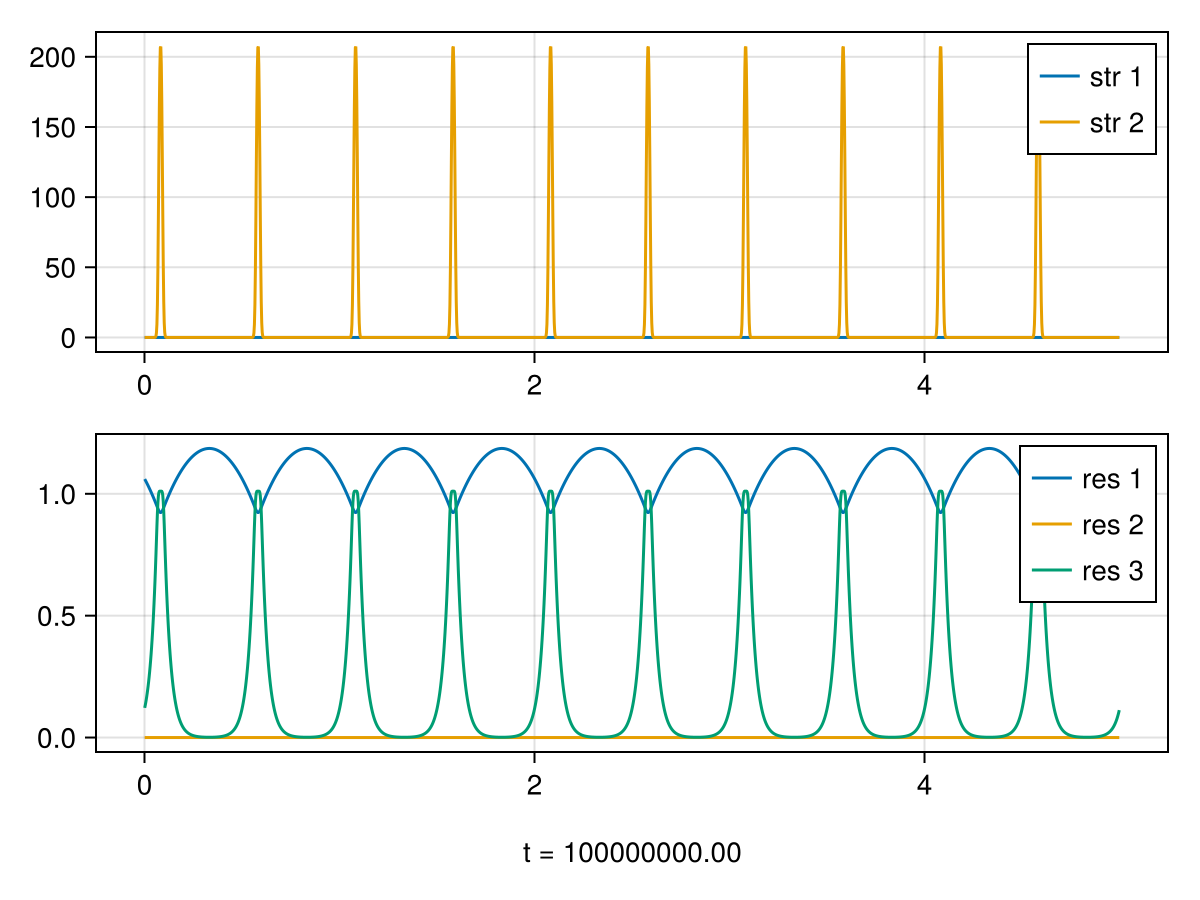

In [160]:
f = plot_1dsmmicrm_sol_snap(s, -1)

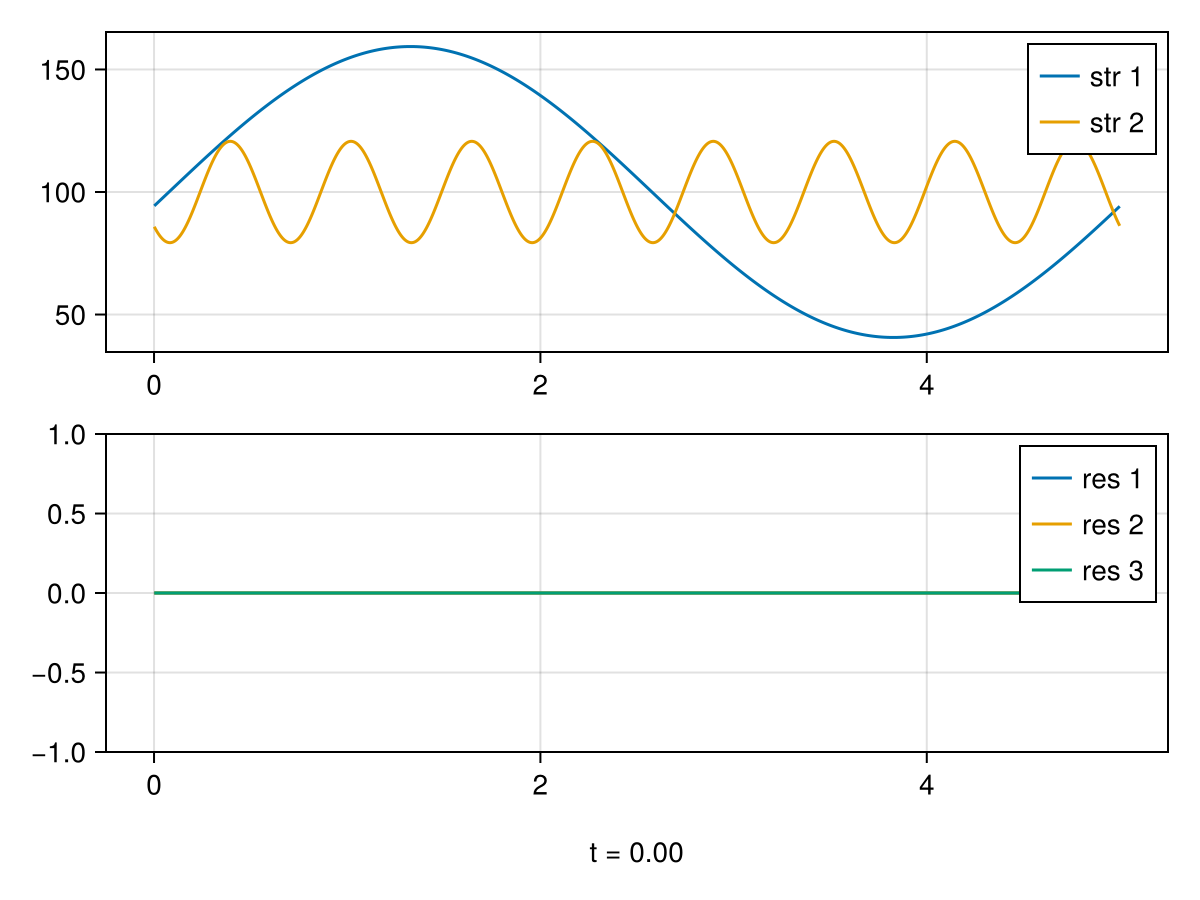

In [161]:
f = plot_1dsmmicrm_sol_snap(s, 1)

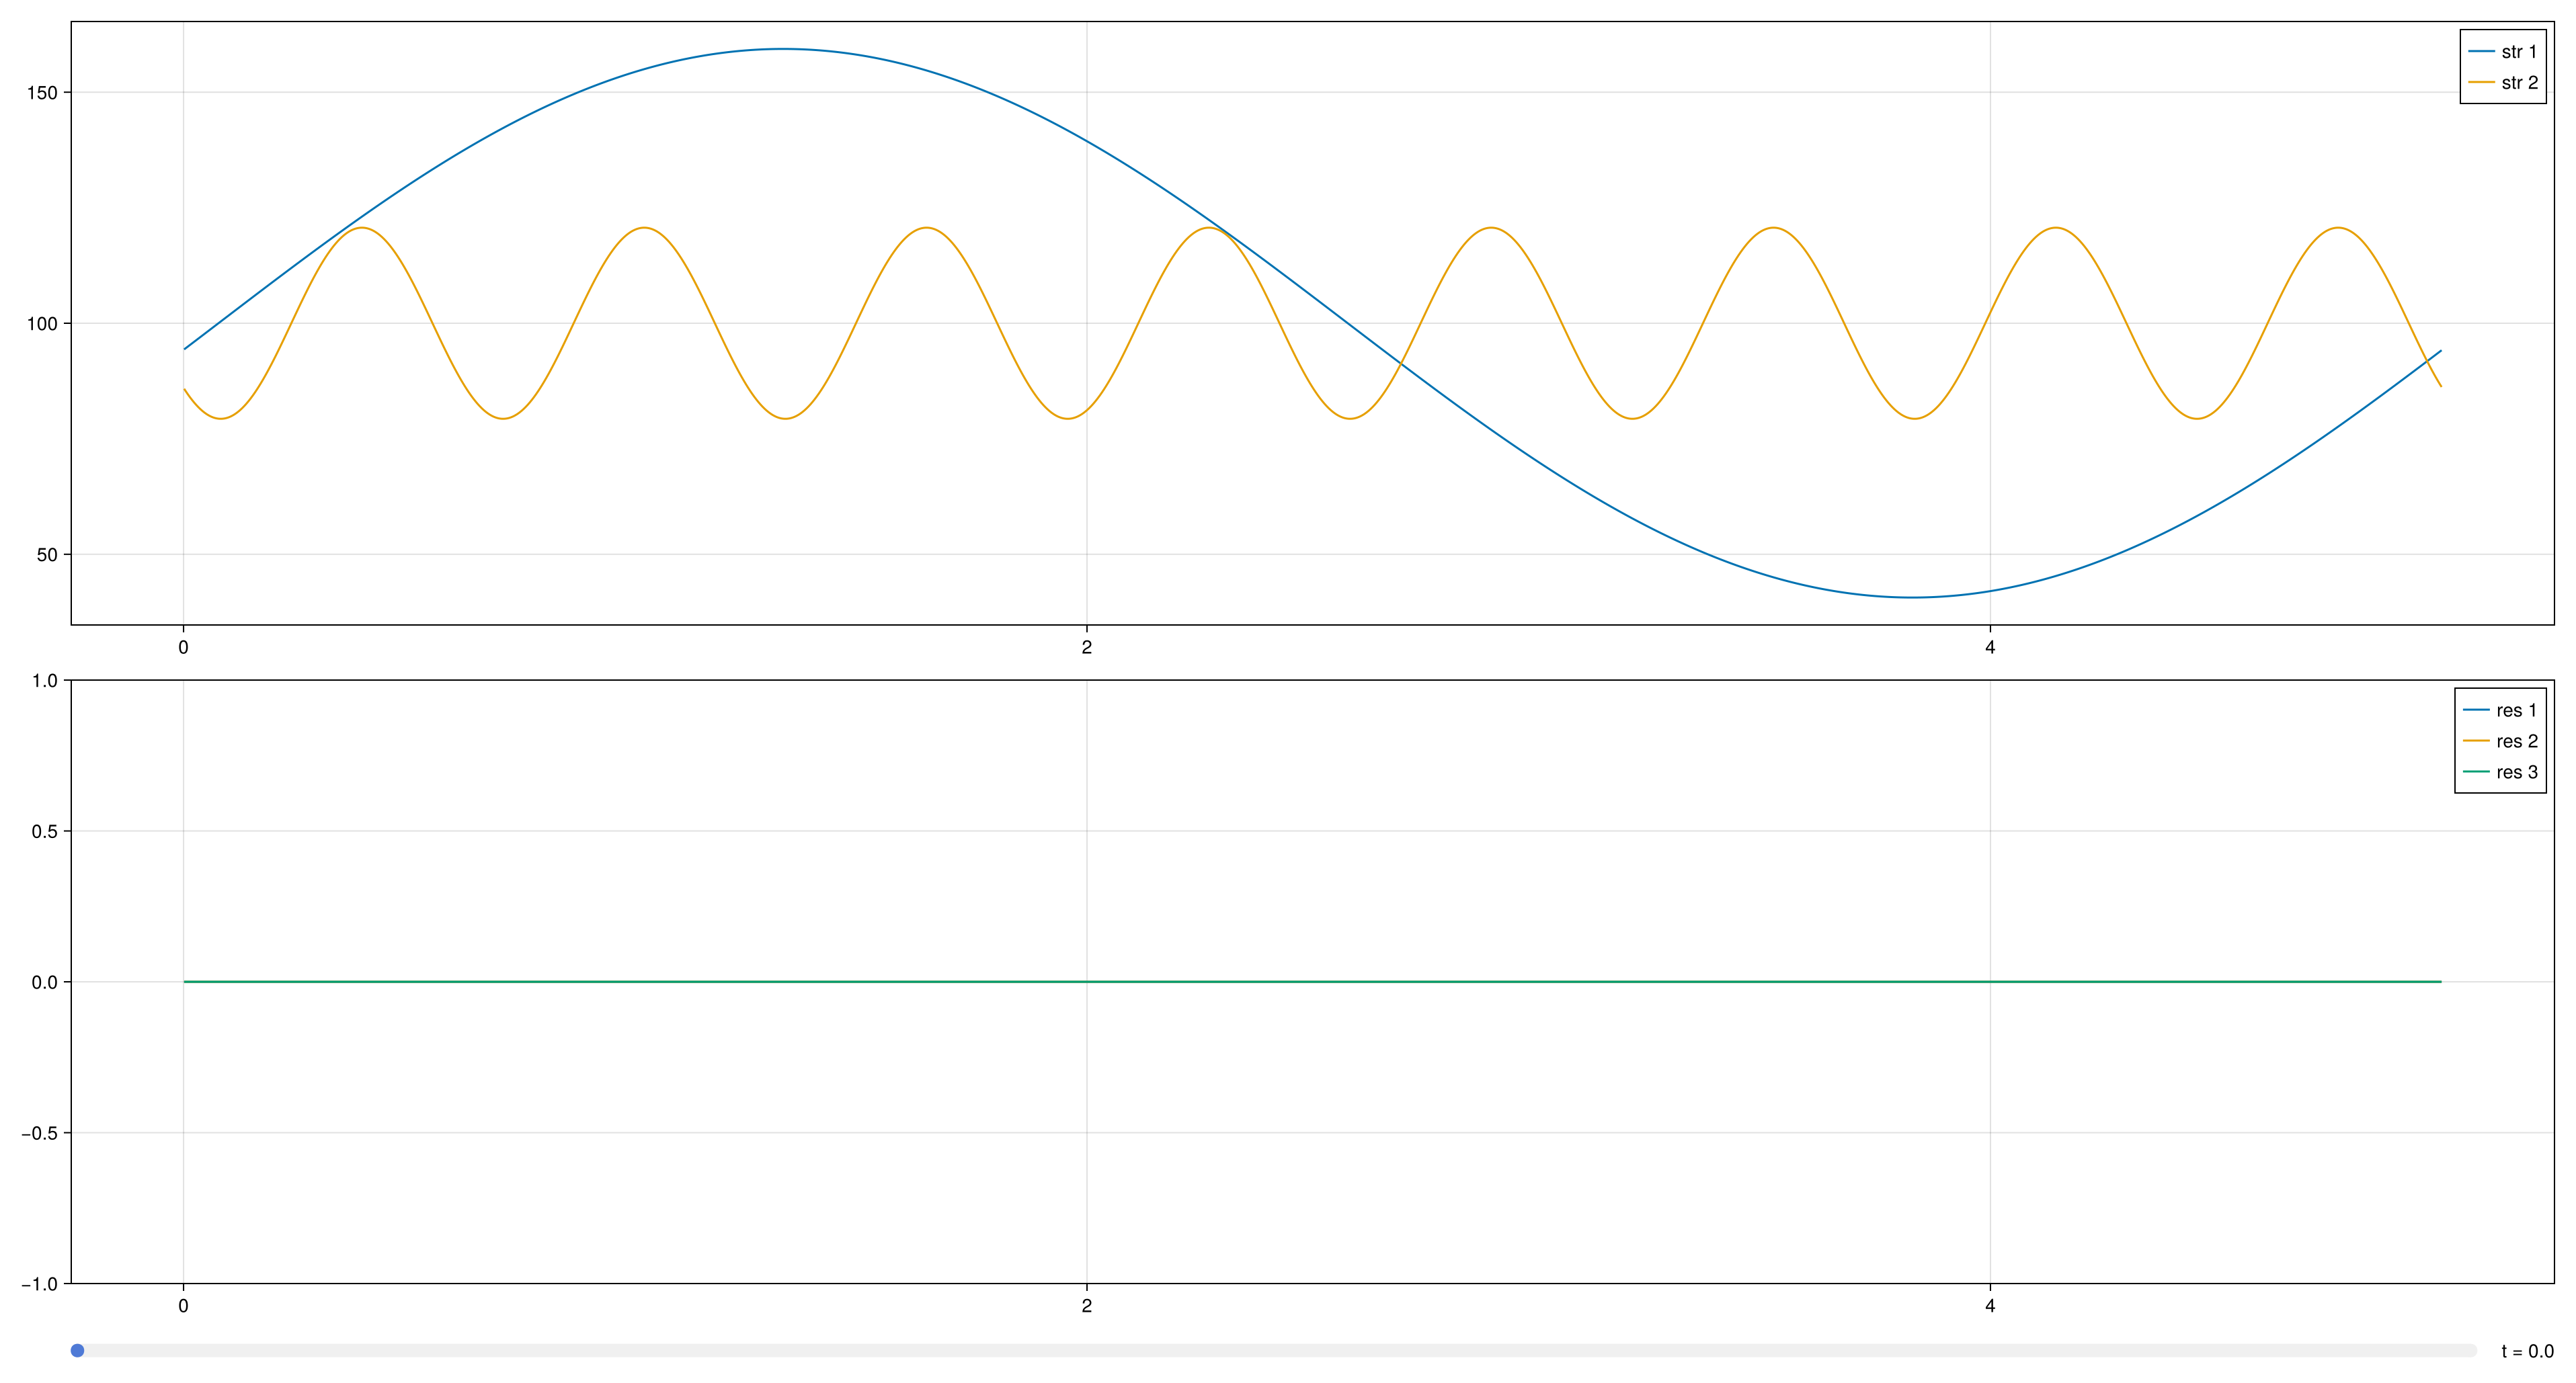

In [162]:
faa = plot_1dsmmicrm_sol_interactive(s)
display(GLMakie.Screen(), faa)
faa

In [106]:
# Label(f[0,1], "MM1 has m of 0.9, MM2 has c of 1.1, everything else is 1"; tellwidth=false)
# Makie.save("../../data/comp_mms/eg1.pdf", f)

# Various testing

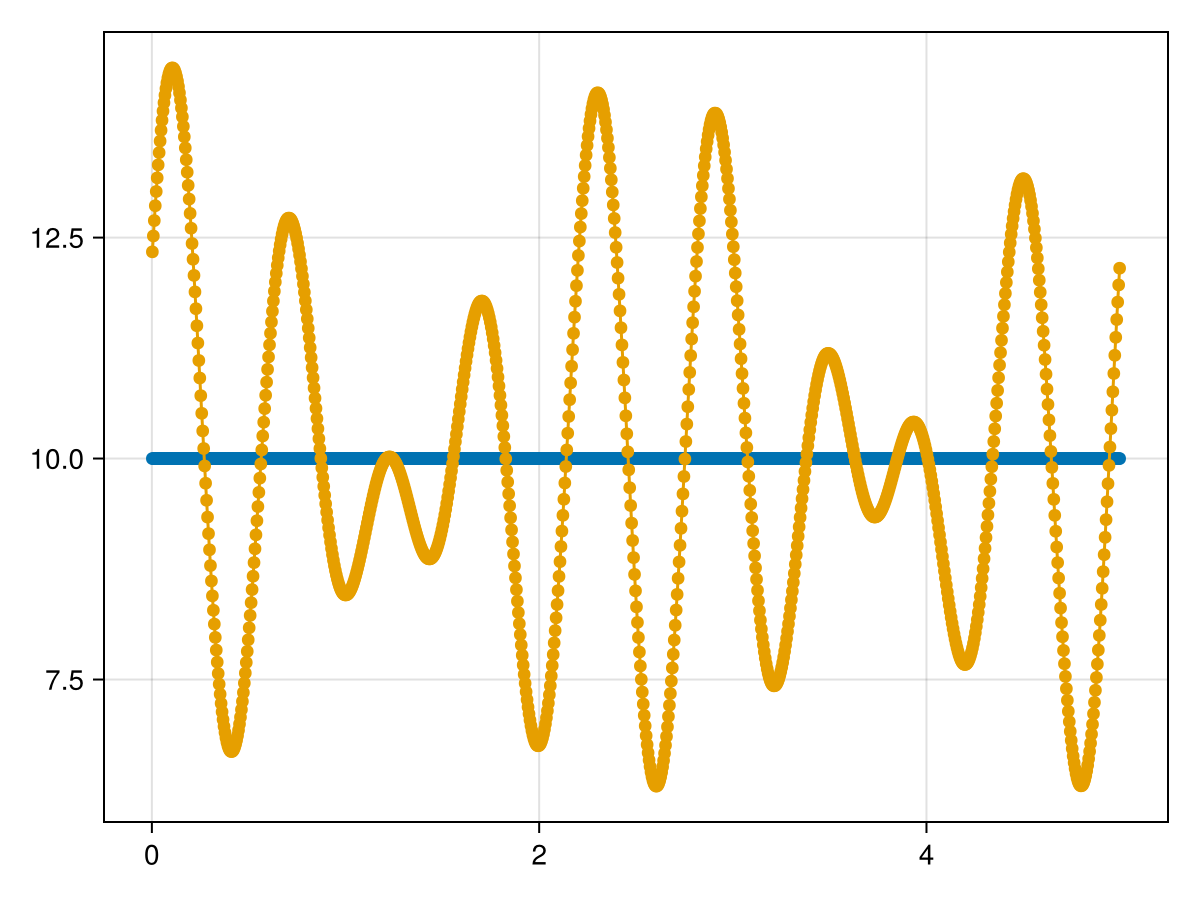

In [119]:
sN = 1000
L = 5
dx = L / sN

u1 = fill(10., sN);
u2 = copy(u1)
add_1d_many_sines!(u2, 4, 3, dx)

xs = ((1:sN) .- 0.5) .* dx

fap = scatterlines(xs, u1)
scatterlines!(fap.axis, xs, u2)

fap